# Práctica 2: Modelo cinemático inverso de un manipulador y planteamiento de trayectoria

## Objetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>


| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.

## Cuestionario previo

¿Qué son las transformaciones homogéneas?
Las transformaciones homogéneas son matrices de 4×4 que combinan rotaciones y traslaciones en una única representación matemática. Estas matrices permiten describir la posición y orientación de un objeto rígido en el espacio tridimensional, facilitando el análisis y control de sistemas robóticos.

¿Qué nos permite obtener el modelo de cinemática directa de un manipulador?
El modelo de cinemática directa permite calcular la posición y orientación del efector final de un robot manipulador a partir de los valores conocidos de las articulaciones y las características geométricas del robot. Este modelo es esencial para determinar cómo se mueve el robot en el espacio en función de sus configuraciones articulares.

¿Qué nos permite obtener el modelo de cinemática inversa de un manipulador?
El modelo de cinemática inversa permite determinar los valores que deben tomar las coordenadas articulares del robot para que su extremo se posicione y oriente según una determinada localización espacial. Este modelo es fundamental para planificar movimientos que lleven al efector final a una posición y orientación deseadas.

¿De qué formas se puede interpolar la trayectoria de un efector final entre dos puntos?
La trayectoria de un efector final entre dos puntos puede interpolarse mediante diversos métodos, entre los que se incluyen:

Interpolación lineal: El efector se mueve en línea recta entre los dos puntos.

Interpolación cúbica: Se utilizan polinomios de tercer grado para suavizar la trayectoria, asegurando continuidad en posición, velocidad y aceleración.

Interpolación esférica (SLERP): Especialmente útil para interpolar rotaciones, permite una transición suave en el espacio tridimensional.

In [1]:
## Desarrollo
##Librerias 

from sympy import*
import matplotlib
import matplotlib.pyplot as plt

# Dimensiones del robot
dim = (0.5, 0.5, 0.5)

# Variables simbólicas globales
theta_0_1, theta_1_2, theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
q_in = (pi/4, -pi/2, 3*pi/8)  # Posiciones iniciales de las articulaciones
xi_fn = (0.5, 0.2, 0)  # Posición final del efector final
tie = (0, 2)  # Tiempo de inicio y final
frec = 60  # Frecuencia de muestreo

ModuleNotFoundError: No module named 'sympy'



### 1. Planteamiento de la cinemática directa
En esta primera parte, se crearán las transformaciones homogéneas y el modelo de cinemática directa de un robot RRR, incluyendo la matriz del Jacobiano. Se recomienda usar **Sympy** para el planteamiento de las expresiones. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/p2_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

In [ ]:
def trans_homo(x, y, z, gamma, beta, alpha):
    R_z = Matrix([[cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0], [0, 0, 1]])
    R_y = Matrix([[cos(beta), 0, -sin(beta)], [0, 1, 0], [sin(beta), 0, cos(beta)]])
    R_x = Matrix([[1, 0, 0], [0, cos(gamma), -sin(gamma)], [0, sin(gamma), cos(gamma)]])
    R = R_x * R_y * R_z
    p = Matrix([[x], [y], [z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0, 0, 0, 1]]))
    return T

def cinematica_directa():
    T_0_1 = trans_homo(0, 0, 0, pi/2, 0, theta_0_1)
    T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
    T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
    T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
    T_0_P = simplify(T_0_1 * T_1_2 * T_2_3 * T_3_P)
    xi_0_P = Matrix([[T_0_P[0, 3]],
                     [T_0_P[2, 3]],
                     [theta_0_1 + theta_1_2 + theta_2_3]])
    return xi_0_P

cinematica_directa()

Matrix([
[0.3*cos(theta_0_1) + 0.3*cos(theta_0_1 + theta_1_2) + 0.3*cos(theta_0_1 + theta_1_2 + theta_2_3)],
[0.3*sin(theta_0_1) + 0.3*sin(theta_0_1 + theta_1_2) + 0.3*sin(theta_0_1 + theta_1_2 + theta_2_3)],
[                                                               theta_0_1 + theta_1_2 + theta_2_3]])

### 2. Planteamiento de la trayectoria

En esta segunda parte, se planteará el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final. Se deben incluir también las gráficas de la posición, velocidad y aceleración del efector final. 

Calcular la trayectoria considerando de forma general tiempo de duración, puntos inicial y final, y con una tasa de muestreo de 30 muestras por segundo. 

In [ ]:
def generar_trayectoria(q_in, xi_fn, tie, frec):
    print("Creando trayectoria")
    t, a_0, a_1, a_2, a_3, a_4, a_5 = symbols("t a_0 a_1 a_2 a_3 a_4 a_5")
    lam = a_0 + a_1*t + a_2*t**2 + a_3*t**3 + a_4*t**4 + a_5*t**5
    lam_dot = diff(lam, t)
    lam_dot_dot = diff(lam_dot, t)

    ec_1 = lam.subs(t, tie[0])
    ec_2 = lam.subs(t, tie[1]) - 1
    ec_3 = lam_dot.subs(t, tie[0])
    ec_4 = lam_dot.subs(t, tie[1])
    ec_5 = lam_dot_dot.subs(t, tie[0])
    ec_6 = lam_dot_dot.subs(t, tie[1])

    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6], [a_0, a_1, a_2, a_3, a_4, a_5], dict=True)

    lam_s = lam.subs(terminos[0])
    lam_dot_s = lam_dot.subs(terminos[0])
    lam_dot_dot_s = lam_dot_dot.subs(terminos[0])

    xi_0_P = cinematica_directa()
    xi_in = xi_0_P.subs({
        theta_0_1: q_in[0],
        theta_1_2: q_in[1],
        theta_2_3: q_in[2]
    })

    xi = xi_in + Matrix([[lam_s * (xi_fn[0] - xi_in[0])],
                         [lam_s * (xi_fn[1] - xi_in[1])],
                         [lam_s * (xi_fn[2] - xi_in[2])]])

    xi_dot = Matrix([[lam_dot_s * (xi_fn[0] - xi_in[0])],
                     [lam_dot_s * (xi_fn[1] - xi_in[1])],
                     [lam_dot_s * (xi_fn[2] - xi_in[2])]])

    xi_dot_dot = Matrix([[lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
                         [lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
                         [lam_dot_dot_s * (xi_fn[2] - xi_in[2])]])
    
    print("Muestreando trayectoria")

    muestras = int(frec * (tie[1] - tie[0]) + 1)
    dt = 1.0 / frec
    t_m = Matrix.zeros(1,muestras)
    t_m[0,0] = tie[0]

    for a in range(muestras-1):
        t_m[0,a+1] =t_m[0,a] + dt
        
    xi_m = Matrix.zeros(3, muestras)
    xi_dot_m = Matrix.zeros(3, muestras)
    xi_dot_dot_m = Matrix.zeros(3, muestras)

    xi_m_func = lambdify([t], xi)
    xi_dot_m_func = lambdify([t], xi_dot)
    xi_dot_dot_m_func = lambdify([t], xi_dot_dot)

    for a in range(muestras):
        xi_m[:, a] = xi_m_func(float(t_m[0, a]))
        xi_dot_m[:, a] = xi_dot_m_func(float(t_m[0, a]))
        xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(t_m[0, a]))
        print(a)

    return xi_m, xi_dot_m, xi_dot_dot_m, t_m, q_in, muestras, dt

### 3. Cinemática inversa
A partir del modelo de la cinemática directa, obtener la expresión e la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. Ya que el modelo de cinemática inversa sólo permite obtener velocidades, obtener también expresiones que permitan obtener la posición de las juntas y sus aceleraciones

In [ ]:
def cinematica_inversa( xi_0_P, xi_dot_m, q_in, muestras, dt,theta_0_1, theta_1_2, theta_2_3):
   
    print("Calculando cinematica inversa")

    xi_0_P=cinematica_directa()

    # Variables simbólicas para las velocidades
    x_0_P_dot, z_0_P_dot, theta_0_P_dot = symbols("x_0_P_dot z_0_P_dot theta_0_P_dot")
    
    # Vector de velocidades del efector final
    xi_dot = Matrix([[x_0_P_dot], [z_0_P_dot], [theta_0_P_dot]])
    
    # Jacobiano y su inversa
    J = Matrix.hstack(
        diff(xi_0_P, theta_0_1), 
        diff(xi_0_P, theta_1_2), 
        diff(xi_0_P, theta_2_3)
    )
    J_inv = J.inv()
    
    # q' = J-1 * xi'
    q_dot = J_inv * xi_dot
    
    # Función para evaluar q_dot
    q_dot_func = lambdify([x_0_P_dot, z_0_P_dot, theta_0_P_dot, theta_0_1, theta_1_2, theta_2_3], q_dot)
    
    # Inicialización de matrices
    q_m = Matrix.zeros(3, muestras)
    q_dot_m = Matrix.zeros(3, muestras)
    q_dot_dot_m = Matrix.zeros(3, muestras)
    
    # Posición inicial
    q_m[:, 0] = Matrix([[q_in[0]], [q_in[1]], [q_in[2]]])
    
    # Velocidad inicial
    q_dot_m[:, 0] = q_dot_func(
        float(xi_dot_m[0, 0]),
        float(xi_dot_m[1, 0]),
        float(xi_dot_m[2, 0]),
        float(q_m[0, 0]),
        float(q_m[1, 0]),
        float(q_m[2, 0])
    )
    
    print("Calculando puntos")
    for a in range(muestras - 1):
        q_m[:, a + 1] = q_m[:, a] + q_dot_m[:, a] * dt
        q_dot_m[:, a + 1] = q_dot_func(
            float(xi_dot_m[0, a + 1]),
            float(xi_dot_m[1, a + 1]),
            float(xi_dot_m[2, a + 1]),
            float(q_m[0, a + 1]),
            float(q_m[1, a + 1]),
            float(q_m[2, a + 1])
        )
        q_dot_dot_m[:, a] = (q_dot_m[:, a + 1] - q_dot_m[:, a]) / dt
        print("Iteración:", a)
    
    # Aceleración final
    q_dot_dot_m[:, muestras - 1] = Matrix.zeros(3, 1)
    
    return q_m, q_dot_m, q_dot_dot_m


### 4. Aplicación de la cinemática inversa
Finalmente, a partir de los puntos de la trayectoria y el modelo de cinemática inversa, obtener las posiciones, velocidades y aceleraciones de las juntas del robot, así como sus gráficas en función del tiempo

In [ ]:
def graficar(t_m, xi_m, xi_dot_m, xi_dot_dot_m, q_m, q_dot_m, q_dot_dot_m):
    fig, ((xi_g, xi_dot_g, xi_dot_dot_g),
          (q_g, q_dot_g, q_dot_dot_g)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

    # Posiciones ws
    xi_g.set_title("Posiciones de WS")
    xi_g.plot(t_m.T, xi_m[0, :].T, color="red")
    xi_g.plot(t_m.T, xi_m[1, :].T, color="green")
    xi_g.plot(t_m.T, xi_m[2, :].T, color="blue")

    # Velocidades ws
    xi_dot_g.set_title("Velocidades de WS")
    xi_dot_g.plot(t_m.T, xi_dot_m[0, :].T, color="red")
    xi_dot_g.plot(t_m.T, xi_dot_m[1, :].T, color="green")
    xi_dot_g.plot(t_m.T, xi_dot_m[2, :].T, color="blue")

    # Aceleraciones ws
    xi_dot_dot_g.set_title("Aceleraciones de WS")
    xi_dot_dot_g.plot(t_m.T, xi_dot_dot_m[0, :].T, color="red")
    xi_dot_dot_g.plot(t_m.T, xi_dot_dot_m[1, :].T, color="green")
    xi_dot_dot_g.plot(t_m.T, xi_dot_dot_m[2, :].T, color="blue")

    # Posiciones q
    q_g.set_title("Posiciones de q")
    q_g.plot(t_m.T, q_m[0, :].T, color="red")
    q_g.plot(t_m.T, q_m[1, :].T, color="green")
    q_g.plot(t_m.T, q_m[2, :].T, color="blue")
    
    # Velocidades q
    q_dot_g.set_title("Velocidades de q")
    q_dot_g.plot(t_m.T, q_dot_m[0, :].T, color="red")
    q_dot_g.plot(t_m.T, q_dot_m[1, :].T, color="green")
    q_dot_g.plot(t_m.T, q_dot_m[2, :].T, color="blue")

    # Aceleraciones q
    q_dot_dot_g.set_title("Aceleraciones de q")
    q_dot_dot_g.plot(t_m.T, q_dot_dot_m[0, :].T, color="red")
    q_dot_dot_g.plot(t_m.T, q_dot_dot_m[1, :].T, color="green")
    q_dot_dot_g.plot(t_m.T, q_dot_dot_m[2, :].T, color="blue")

    plt.tight_layout()
    plt.show()



Creando trayectoria
Muestreando trayectoria
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iteración: 10
Iteración: 11
Iteración: 12
Iteración: 13
Iteración: 14
Iteración: 15
Iteración: 16
Iteración: 17
Iteración: 18
Iteración: 19
Iteración: 20
Iteración: 21
Iteración: 22
Iteración: 23
Iteración: 24
Iteración: 25
Iteración: 26
Iteración: 27
Iteración: 28
Iteración: 29
Iteración: 30
Iteración: 31
Iteración: 32
Iteración: 33
Iteración: 34
Iteración: 35
Iteración: 36
Iteración: 37
Iteración: 3

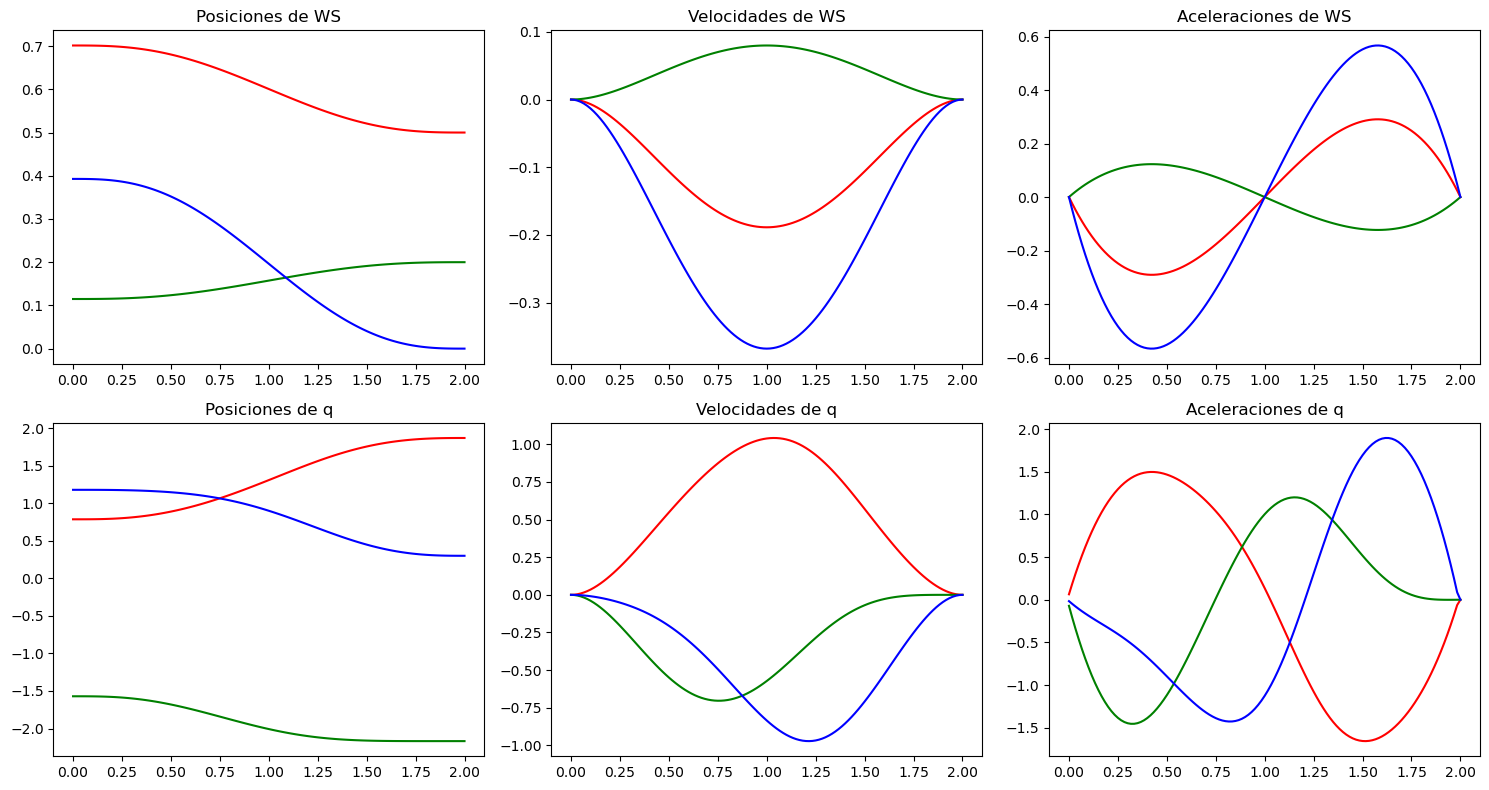

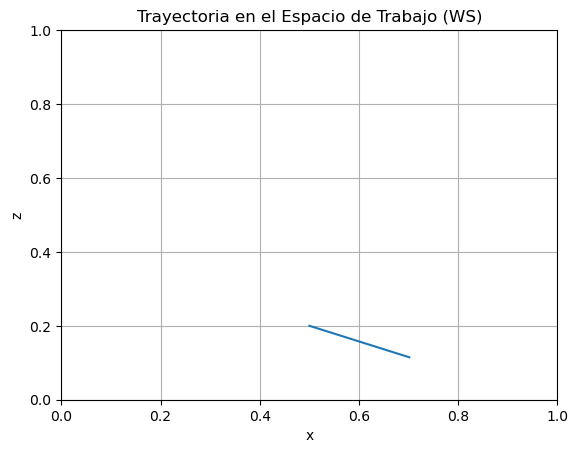

In [ ]:
 def graficar_ws(xi_m):
    plt.plot(xi_m[0, :].T, xi_m[1, :].T)
    plt.axis((0, 1, 0, 1))
    plt.title("Trayectoria en el Espacio de Trabajo (WS)")
    plt.xlabel("x")
    plt.ylabel("z")
    plt.grid(True)
    plt.show()

xi_m, xi_dot_m, xi_dot_dot_m, t_m, q_in, muestras, dt = generar_trayectoria(q_in=q_in, xi_fn=xi_fn, tie=tie, frec=frec)

#Cinemática inversa
q_m, q_dot_m, q_dot_dot_m = cinematica_inversa(xi_m, xi_dot_m, q_in, muestras, dt, theta_0_1, theta_1_2, theta_2_3)

# Graficar los resultados
graficar(t_m, xi_m, xi_dot_m, xi_dot_dot_m, q_m, q_dot_m, q_dot_dot_m)
graficar_ws(xi_m)

### 5. Github

Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

- ¿Qué utilidad tuvo usar el modelo de cinemática inversa de un robot?

El uso del modelo de cinemática inversa de un robot tuvo como utilidad principal la posibilidad de traducir una tarea deseada específicamente, la posición y orientación final que debía alcanzar el efector del robot en los valores exactos que debían adoptar sus articulaciones. Esto fue esencial para que el robot pudiera ejecutar movimientos complejos, como alcanzar un objeto, soldar en un punto exacto o posicionar una herramienta con precisión. Además, permitió validar el diseño del robot y ajustar los algoritmos de control para mejorar su desempeño. En el contexto práctico, facilitó la programación de trayectorias y la simulación de movimientos antes de ser ejecutados físicamente, reduciendo errores y optimizando el tiempo de desarrollo.

- ¿Qué utilidad tiene el modelo de cinemática inversa de un robot?

El modelo de cinemática inversa tiene una utilidad fundamental en la programación y operación de robots, ya que permite calcular los valores articulares necesarios para que el efector final (por ejemplo, una pinza o una herramienta) alcance una posición específica en el espacio tridimensional. Esto es especialmente relevante en tareas automatizadas donde se requiere precisión, como en ensamblajes, soldadura, impresión 3D o manipulación de objetos. A diferencia de la cinemática directa, que parte de los ángulos de las articulaciones para calcular la posición del efector, la cinemática inversa trabaja en sentido opuesto, lo cual es más útil desde una perspectiva de control por objetivos. Gracias a este modelo, los robots pueden adaptarse a diferentes situaciones de trabajo, seguir trayectorias planificadas o incluso responder a datos de sensores en tiempo real.

- ¿Qué utilidad tiene el modelo de cinemática inversa de un robot?

La utilidad del modelo de cinemática inversa en un robot reside en su capacidad para convertir requerimientos espaciales en comandos mecánicos precisos. Esto significa que si se conoce el punto en el que se desea que el robot actúe (por ejemplo, una posición en una línea de ensamblaje), el modelo permite calcular automáticamente cómo deben moverse cada una de las articulaciones del robot para llegar a ese punto. Este proceso es crucial en la mayoría de los sistemas de robótica moderna, especialmente en aquellos con múltiples grados de libertad. Además, su utilidad no solo es operativa, sino también en simulación, análisis y optimización de movimientos, permitiendo prever colisiones, minimizar el consumo de energía o ajustar trayectorias para mayor eficiencia. Por estas razones, la cinemática inversa es una herramienta clave en el diseño, programación y ejecución de sistemas robóticos avanzados.


## Conclusiones

La presente práctica permitió comprender y aplicar los conceptos fundamentales de la cinemática inversa en manipuladores robóticos. A través del análisis y modificación de archivos URDF, así como la implementación de algoritmos para el cálculo de trayectorias, se logró simular con éxito el movimiento desde una posición inicial hacia una posición objetivo. Esta experiencia fortaleció la capacidad para modelar y controlar sistemas robóticos, habilidades esenciales para el diseño y desarrollo de soluciones automatizadas en entornos industriales y de investigación. Además, la visualización y evaluación de los resultados permitió consolidar el entendimiento de la relación entre los parámetros articulares y la posición del efector final en el espacio.

## Bibliografía 

A. Gutiérrez-Giles, Transformaciones homogéneas, Facultad de Ingeniería, UNAM. [En línea]. Disponible en: https://ccc.inaoep.mx/~alejandro.giles/assets/pdf/04-transformaciones_homogeneas.pdf

A. Jaramillo, Cinemática de manipuladores robóticos. [En línea]. Disponible en: https://www.wag.caltech.edu/home/ajaramil/libro_robotica/cinematica.pdf

P. Oramos, Cinemática inversa de robots manipuladores. [En línea]. Disponible en: https://oramosp.epizy.com/teaching/201/fund-robotica/clases/5_Cinematica_Inversa.pdf

Universidad Miguel Hernández, Planificación de trayectorias. [En línea]. Disponible en: https://nbio.umh.es/files/2012/04/practica5.pdf


